### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [5]:
conda install conda-forge::matplotlib

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")



             country  beer_servings  spirit_servings  wine_servings  \
3            Andorra            245              138            312   
8          Australia            261               72            212   
9            Austria            279               75            191   
6          Argentina            193               25            221   
4             Angola            217               57             45   
1            Albania             89              132             54   
5  Antigua & Barbuda            102              128             45   
7            Armenia             21              179             11   
2            Algeria             25                0             14   
0        Afghanistan              0                0              0   

   total_litres_of_pure_alcohol  
3                          12.4  
8                          10.4  
9                           9.7  
6                           8.3  
4                           5.9  
1             

<Axes: xlabel='country'>

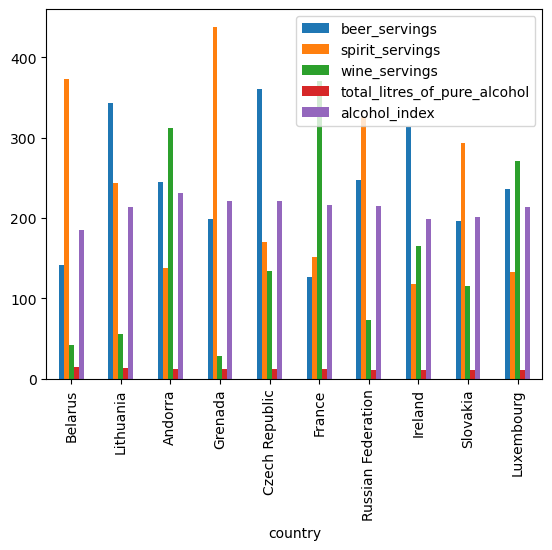

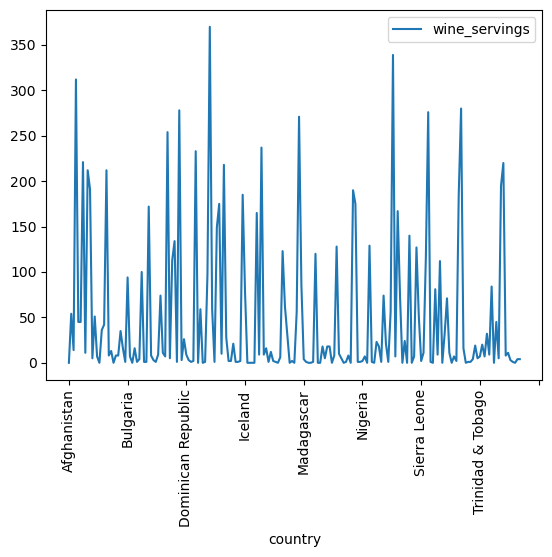

In [ ]:
#1a
print(df.head(10).sort_values(by="total_litres_of_pure_alcohol", ascending=False))

#1b
beer_mean = df.beer_servings.mean()
print("Consumo medio di birra: " + str(round(beer_mean, 1)) + " litri.")
wine_mean = df.wine_servings.mean()
print("Consumo medio di vino: " + str(round(wine_mean, 1)) + " litri.")
spirit_mean = df.spirit_servings.mean()
print("Consumo medio di distillati: " + str(round(spirit_mean, 1)) + " litri.")

#1c
df["alcohol_index"] = ((df.beer_servings + df.spirit_servings + df.wine_servings) / 3).astype(float)

#1d
print(df.country[df['alcohol_index'].idxmax()])

#1e
print(df[df['beer_servings'] > 100])

#2
df.set_index('country').sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10).plot.bar()

#3
df.sort_values(by="country").plot.line('country', 'wine_servings', rot=90)

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#

paesi = df['job_country'].unique()
#len(paesi)
for paese in paesi:
    media = df[df['job_country'] == paese]['salary_year_avg'].mean()
    print(f"Il salario medio annuale di {paese} è pari a {media:.0f}")
    job_count = (df['job_country'] == paese).sum()
    print(f"Ci sono {job_count} entrate per {paese}")
    min_salary = (df[df['job_country'] == paese]['salary_year_avg']).min()
    max_salary = (df[df['job_country'] == paese]['salary_year_avg']).max()
    print(f"In {paese} lo stipendio minimo è {min_salary} e il massimo è {max_salary}")



Il salario medio annuale di United States è pari a 126134
Ci sono 206292 entrate per United States
In United States lo stipendio minimo è 23496.0 e il massimo è 960000.0
Il salario medio annuale di Mexico è pari a 114950
Ci sono 15139 entrate per Mexico
In Mexico lo stipendio minimo è 45000.0 e il massimo è 249000.0
Il salario medio annuale di Germany è pari a 115801
Ci sono 27694 entrate per Germany
In Germany lo stipendio minimo è 29900.0 e il massimo è 224500.0
Il salario medio annuale di Sudan è pari a 134052
Ci sono 21781 entrate per Sudan
In Sudan lo stipendio minimo è 25000.0 e il massimo è 550000.0
Il salario medio annuale di Romania è pari a 102378
Ci sono 3726 entrate per Romania
In Romania lo stipendio minimo è 43200.0 e il massimo è 194500.0
Il salario medio annuale di Denmark è pari a 111008
Ci sono 6952 entrate per Denmark
In Denmark lo stipendio minimo è 56700.0 e il massimo è 166419.5
Il salario medio annuale di Switzerland è pari a 105229
Ci sono 9924 entrate per Switz

Text(0.5, 1.0, 'Salario medio annuale per Job Title')

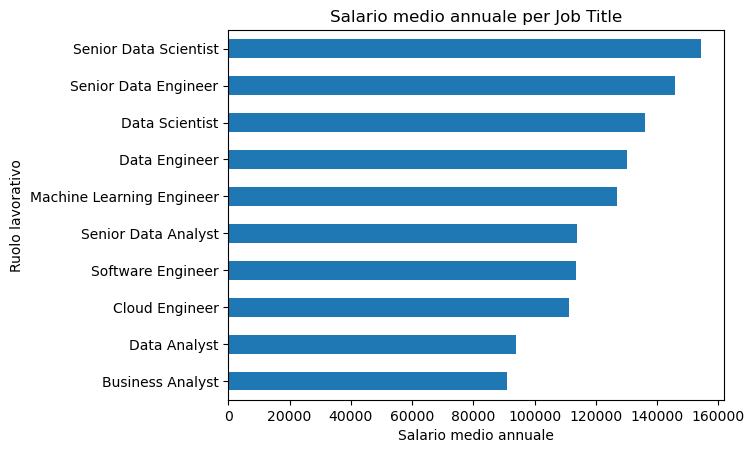

In [ ]:
medie = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)
medie.plot(kind='barh')
plt.xlabel("Salario medio annuale")
plt.ylabel("Ruolo lavorativo")
plt.title("Salario medio annuale per Job Title")